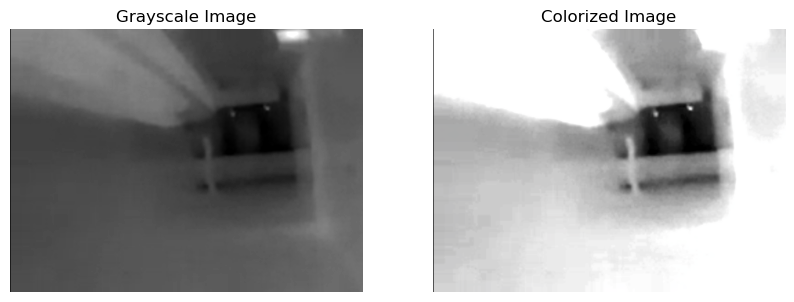

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained model files
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

# Load the model
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load cluster centers for ab channels
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1)

# Assign cluster centers to the model
net.getLayer(class8).blobs = [pts_in_hull.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Function to colorize a grayscale image
def colorize_image(image_path):
    # Load image and convert to LAB color space
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Ensure grayscale
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert back to 3 channels
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

    # Extract L channel and normalize
    L = img_lab[:, :, 0]  # Lightness channel
    L = L.astype("float32") / 255.0  # Normalize
    L = cv2.dnn.blobFromImage(L, scalefactor=1.0, size=(224, 224), mean=(50,))

    # Predict AB channels
    net.setInput(L)
    ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))  # Reshape output

    # Resize AB channels to match original image size
    ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

    # Merge L and AB channels
    img_lab_out = np.concatenate((img_lab[:, :, 0][:, :, np.newaxis], ab_channels), axis=2)
    
    # Convert LAB to RGB
    img_colorized = cv2.cvtColor(img_lab_out.astype("float32"), cv2.COLOR_LAB2RGB)
    img_colorized = np.clip(img_colorized, 0, 1)

    # Show original and colorized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_colorized)
    plt.title("Colorized Image")
    plt.axis("off")
    plt.show()

# Run the function on an example image
colorize_image("image.png")


/tmp/ipykernel_13629/1298045184.py:44: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


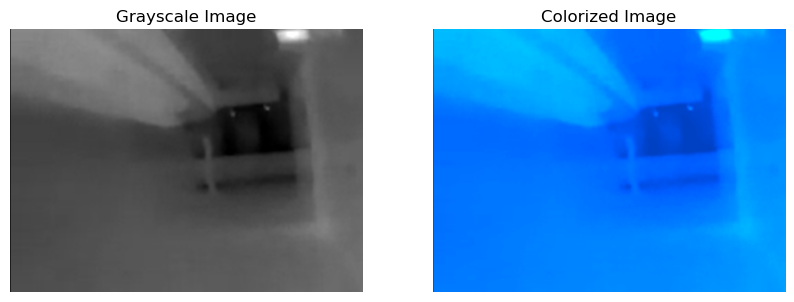

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load and process the image
image_path = "image.png"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Ensure 3-channel image

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))
img_resized = img_resized.astype("float32") / 255.0
img_resized = img_resized - 0.5
img_resized = img_resized * 2

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Merge L and AB channels
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Colorized Image")
ax[1].axis("off")

plt.show()


/tmp/ipykernel_13629/2924398764.py:46: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


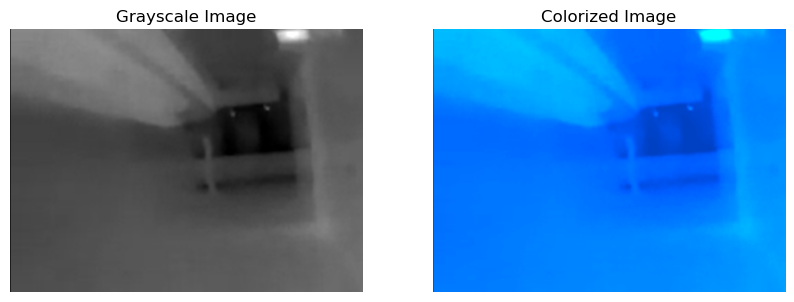

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load and process the grayscale image
image_path = "image.png"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))
img_resized = img_resized.astype("float32") / 255.0
img_resized = img_resized - 0.5
img_resized = img_resized * 2

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Merge L and AB channels
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)

# Convert back to BGR
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Colorized Image")
ax[1].axis("off")

plt.show()


Shape of L: (1293, 1735)
Shape of ab_channels: (1293, 1735, 2)
Range of L: 0 to 255
Range of ab_channels: nan to nan
Range of colorized_img: 0 to 255


/tmp/ipykernel_13629/995213601.py:52: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


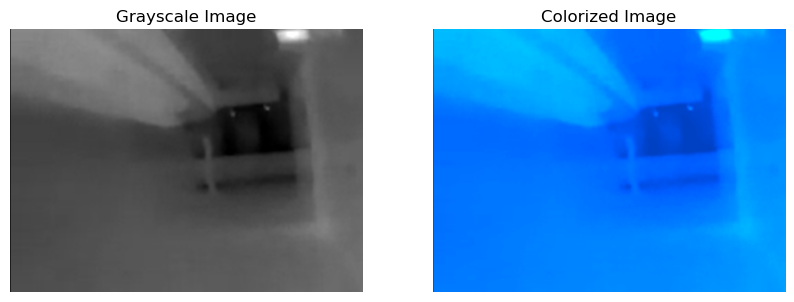

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load and process the grayscale image
image_path = "image.png"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))
img_resized = img_resized.astype("float32") / 255.0
img_resized = img_resized - 0.5
img_resized = img_resized * 2

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Debugging: Check shape and value ranges
print(f"Shape of L: {L.shape}")
print(f"Shape of ab_channels: {ab_channels.shape}")
print(f"Range of L: {L.min()} to {L.max()}")
print(f"Range of ab_channels: {ab_channels.min()} to {ab_channels.max()}")

# Merge L and AB channels in LAB space
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)

# Convert back to BGR
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Debugging: Check the colorized image values
print(f"Range of colorized_img: {colorized_img.min()} to {colorized_img.max()}")

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Colorized Image")
ax[1].axis("off")

plt.show()


Range of img_resized: -1.0 to 1.0
Range of ab_channels before resizing: nan to nan


/tmp/ipykernel_13629/1368232253.py:57: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


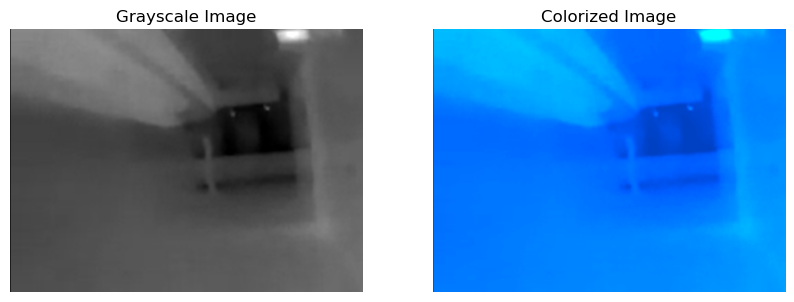

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load and process the grayscale image
image_path = "image.png"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))

# Normalize the image to [-1, 1] range as expected by the model
img_resized = img_resized.astype("float32") / 255.0  # Normalize to [0, 1]
img_resized = (img_resized - 0.5) * 2  # Rescale to [-1, 1]

# Debugging: Check the value range after rescaling
print(f"Range of img_resized: {img_resized.min()} to {img_resized.max()}")

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Debugging: Check ab_channels for NaN values
print(f"Range of ab_channels before resizing: {ab_channels.min()} to {ab_channels.max()}")

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Check for NaN values in ab_channels
if np.isnan(ab_channels).any():
    print("Warning: NaN values detected in ab_channels.")

# Merge L and AB channels in LAB space
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)

# Convert back to BGR
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Colorized Image")
ax[1].axis("off")

plt.show()


/tmp/ipykernel_13629/1674863721.py:53: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


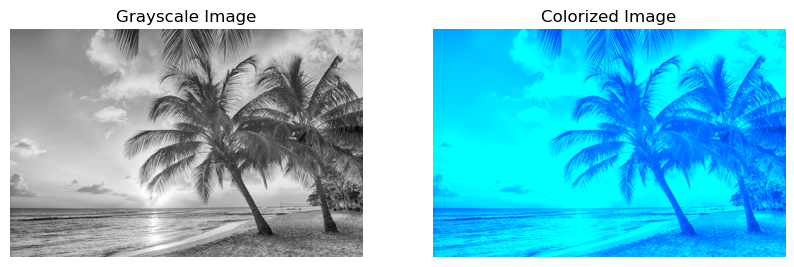

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load a simple test grayscale image, e.g., a simple black and white image
image_path = "simple_grayscale_test_image.png"  # Replace with a simple test image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))

# Normalize the image to [-1, 1] range as expected by the model
img_resized = img_resized.astype("float32") / 255.0  # Normalize to [0, 1]
img_resized = (img_resized - 0.5) * 2  # Rescale to [-1, 1]

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Check if NaNs are still present
if np.isnan(ab_channels).any():
    print("Warning: NaN values detected in ab_channels.")
else:
    print(f"Range of ab_channels: {ab_channels.min()} to {ab_channels.max()}")

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Merge L and AB channels in LAB space
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)

# Convert back to BGR
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Colorized Image")
ax[1].axis("off")

plt.show()


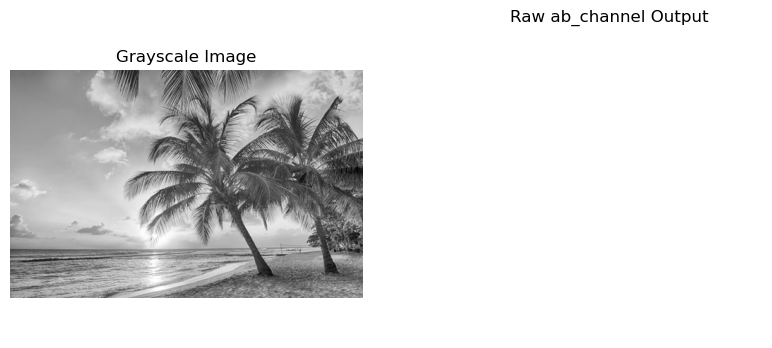

/tmp/ipykernel_13629/1506683248.py:66: RuntimeWarning: invalid value encountered in cast
  colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)


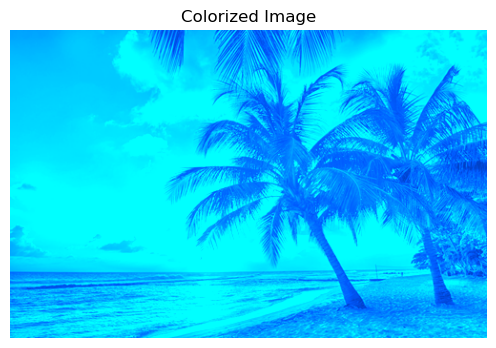

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
proto_path = "models/colorization_deploy_v2.prototxt"
model_path = "models/colorization_release_v2.caffemodel"
points_path = "models/pts_in_hull.npy"

net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
pts_in_hull = np.load(points_path)

# Load a simple test grayscale image
image_path = "simple_grayscale_test_image.png"  # Replace with a simple test image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is 3 channels (BGR) for colorization
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = img_lab[:, :, 0]  # Extract the L channel

# Set up network input
net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.transpose().reshape(2, 313, 1, 1)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Resize image for model input
H_in, W_in = 224, 224
img_resized = cv2.resize(L, (W_in, H_in))

# Normalize the image to [-1, 1] range as expected by the model
img_resized = img_resized.astype("float32") / 255.0  # Normalize to [0, 1]
img_resized = (img_resized - 0.5) * 2  # Rescale to [-1, 1]

# Forward pass
net.setInput(cv2.dnn.blobFromImage(img_resized))
ab_channels = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Check if NaNs are present in ab_channels
if np.isnan(ab_channels).any():
    print("Warning: NaN values detected in ab_channels.")
else:
    print(f"Range of ab_channels before resizing: {ab_channels.min()} to {ab_channels.max()}")

# Display the raw ab_channels to inspect
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

# Display the raw ab_channels as a check
ax[1].imshow(ab_channels[:, :, 0], cmap='jet')
ax[1].set_title("Raw ab_channel Output")
ax[1].axis("off")

plt.show()

# Resize ab channels to match original image
ab_channels = cv2.resize(ab_channels, (img.shape[1], img.shape[0]))

# Merge L and AB channels in LAB space
colorized_img_lab = np.concatenate((L[:, :, np.newaxis], ab_channels), axis=2)

# Convert back to BGR
colorized_img = cv2.cvtColor(colorized_img_lab.astype("uint8"), cv2.COLOR_LAB2BGR)

# Display final colorized image
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))
ax.set_title("Colorized Image")
ax.axis("off")
plt.show()
